In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [20]:
x1 = np.arange(1, 201)
x2 = np.square(x1)

y = np.log(x1)


print(x1.shape, x2.shape, y.shape)


(200,) (200,) (200,)


Text(0, 0.5, 'y')

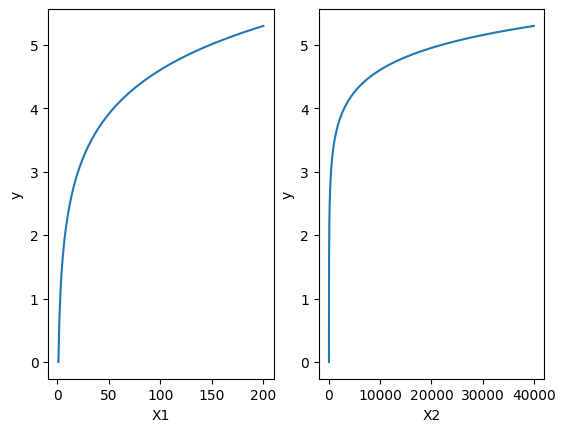

In [15]:
ax = plt.subplot(121)
ax.plot(x1, y)
ax.set_xlabel('X1')
ax.set_ylabel('y')
ax = plt.subplot(122)
ax.plot(x2, y)
ax.set_xlabel('X2')
ax.set_ylabel('y')

In [16]:
np.corrcoef(x1, y)

array([[1.        , 0.88615724],
       [0.88615724, 1.        ]])

In [17]:
np.corrcoef(x2, y)

array([[1.        , 0.76700235],
       [0.76700235, 1.        ]])

In [22]:
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression()

X = pd.DataFrame({'x1':x1, 'x2': x2})

X


,x1,x2
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
...,...,...
195,196,38416
196,197,38809
197,198,39204
198,199,39601


In [23]:
linear_reg.fit(X, y)

LinearRegression()

In [25]:
y_pred = linear_reg.predict(X)
y_pred.shape

(200,)

Text(0, 0.5, 'y_predicted')

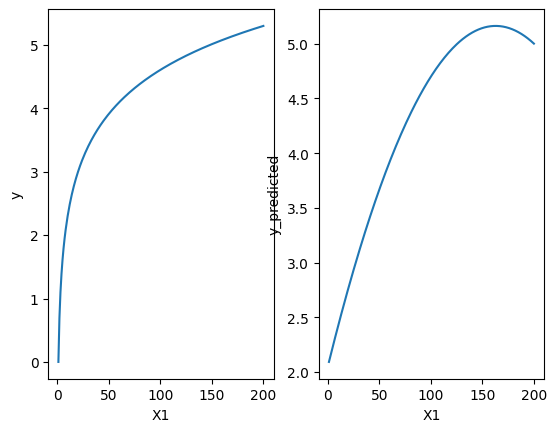

In [26]:
ax = plt.subplot(121)
ax.plot(x1, y)
ax.set_xlabel('X1')
ax.set_ylabel('y')
ax = plt.subplot(122)
ax.plot(x1, y_pred)
ax.set_xlabel('X1')
ax.set_ylabel('y_predicted')

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

error_dict = {
    'MAE':mean_absolute_error(y, y_pred), 
    'MSE': mean_squared_error(y, y_pred),
    'MAPE':mean_absolute_percentage_error(y, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y, y_pred)), 
    'R2': r2_score(y, y_pred)
}


In [29]:
error_dict

{'MAE': 0.17494392915674264,
 'MSE': 0.07263836657396912,
 'MAPE': 47123774363941.73,
 'RMSE': 0.26951505815810944,
 'R2': 0.9198664457721043}

In [30]:
x1 = np.arange(1, 201)
x2 = np.sqrt(x1)

y = np.exp(x1+x2)

data = pd.DataFrame({
    'x1':x1,
    'x2':x2,
    'y':y
})

data

,x1,x2,y
0,1,1.000000,7.389056e+00
1,2,1.414214,3.039304e+01
2,3,1.732051,1.135281e+02
3,4,2.000000,4.034288e+02
4,5,2.236068,1.388623e+03
...,...,...,...
195,196,14.000000,1.591627e+91
196,197,14.035669,4.483596e+91
197,198,14.071247,1.262910e+92
198,199,14.106736,3.556964e+92
